# Eleven Warriors Sentiment Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

import nltk
#nltk.download('stopwords')
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import re
import random

# Import libraries
import numpy as np 
import seaborn as sns

# Topic Modeling
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix, ConfusionMatrixDisplay

# Convert categorical to numeric for ANN & Classification ANN
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier

In [3]:
os.chdir('/Users/wesjurden/Documents/GitHub/Personal/college-football-project/data/clean')

df = pd.read_csv('clean_eleven_warriors_articles.csv')
df.columns

Index(['title', 'description', 'date'], dtype='object')

In [7]:
# Look at a value
df['description'][3]

"Jayden Bonsu has experience at all three safety positions and the speed, anticipation and size to eventually thrive in Jim Knowles' three-safety defense at Ohio State."

In [8]:
# Convert to lower 
df['description'] = df['description'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Confirm changes
df['description'][3]

"jayden bonsu has experience at all three safety positions and the speed, anticipation and size to eventually thrive in jim knowles' three-safety defense at ohio state."

In [15]:
# Create function to remove punctuation
def remove_punctuation(string):
    pattern = r'[^\w\s]'
    cleaned_string = re.sub(pattern, '', string)
    return cleaned_string

In [16]:
# Apply remove_punctuation function to the description column
df['description'] = df['description'].apply(lambda x: remove_punctuation(x))

# Confrim changes
df['description'][3]

'jayden bonsu experience three safety positions speed anticipation size eventually thrive jim knowles threesafety defense ohio state'

In [17]:
## REMOVE STOP WORDS

# Choose language
stop = stopwords.words('english')

# Remove stop words
df['description'] = df['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

df['description'][3]

'jayden bonsu experience three safety positions speed anticipation size eventually thrive jim knowles threesafety defense ohio state'

In [32]:
# Remove common phrases

phrases = ['ohio', 'state', 'buckeye', 'buckeyes', 'football', 'team', 'game', 'season']

df['description'] = df['description'].apply(lambda x: " ".join(x for x in x.split() if x not in phrases)) 

df['description'][3]

'jayden bonsu experi three safeti posit speed anticip size eventu thrive jim knowl threesafeti defen'

In [33]:
# Stem Words

# Initalize PorterStemmer
porstem = PorterStemmer()

# Stem Words
df['description'] = df['description'].apply(lambda x: " ".join([porstem.stem(word) for word in x.split()]))

df['description'][3]

'jayden bonsu experi three safeti posit speed anticip size eventu thrive jim knowl threesafeti defen'

In [34]:
# Create Term by Document Matrix

from sklearn.feature_extraction.text import CountVectorizer

# Initalize Count Vectorizer
vectorizer = CountVectorizer()

# Create TBD
tokens_data = pd.DataFrame(vectorizer.fit_transform(df['description']).toarray(), columns=vectorizer.get_feature_names_out())

# Print list of 50 random terms
print(random.sample(tokens_data.columns.tolist(),50))

['doorstep', 'cleveland', '387', 'mcquaid', 'simpl', 'bye', 'hourandahalf', 'lot', 'hospit', 'shi', 'arbor', 'event', 'longsnap', 'dispel', 'bednarik', 'signal', 'split', 'rich', 'kent', 'habit', 'everyth', 'henri', 'rhythm', 'homecom', 'footstep', 'rotari', 'parker', 'prospect', 'facil', 'wideout', 'lexington', 'syracu', 'super', '11w', 'broadcast', 'week', 'falcon', '140', 'enabl', 'video', 'embarrass', 'raekwon', 'wru', 'dan', 'accord', 'tomfooleri', 'throw', 'readytoplay', 'minim', 'dive']


In [35]:
# View top 10 terms
sort_text = tokens_data.sum()
sort_text.sort_values(ascending = False).head(10)

day       328
defen     262
play      258
ryan      247
year      214
nfl       209
offen     199
player    199
say       186
cj        183
dtype: int64

## Sentiment Analysis

In [40]:
# Need to first classify the articles as either positive, negative, or neutral
# Need to use R for bing or nrc
# Or pip3 install afinn
from afinn import Afinn

In [45]:
#instantiate afinn
afn = Afinn()
          
# compute scores (polarity) and labels
scores = [afn.score(description) for description in df['description']]
sentiment = ['positive' if score > 0
                          else 'negative' if score < 0
                              else 'neutral'
                                  for score in scores]
     
# dataframe creation
df['score'] = scores
df['sentiment'] = sentiment
df.sample(5)

,title,description,date,score,sentiment
1881,NORWELL JOINING COMMANDERS,former offen lineman andrew norwel sign washin...,2022-03-17,0.0,neutral
1259,FIVE THINGS TO KNOW ABOUT WISCONSIN,wisconsin possess domin defen one big ten best...,2022-09-19,4.0,positive
1574,"STROUD, JSN, HENDERSON, BURKE CASH IN",cj stroud jaxon smithnjigba treveyon henderson...,2022-07-17,0.0,neutral
543,PEACH BOWL / CFP TRAILER,need opportun time shock world,2022-12-29,-2.0,negative
575,MR. BRIGHTSIDE,christma push neg concern side one day,2022-12-25,0.0,neutral


In [61]:
# View negative data to check if its right
df[df['sentiment'] == 'negative'].sort_values(by = 'score')

,title,description,date,score,sentiment
1077,FIVE THINGS TO KNOW ABOUT IOWA,five thing know iowa worst offen fb worst star...,2022-10-17,-8.0,negative
789,"DAY TALKS MICHIGAN, HARBAUGH, CORUM",ryan day discuss threat michigan pose hardship...,2022-11-22,-7.0,negative
727,PLAYOFF HOPES STILL ALIVE,saturday loss michigan crush blow 2022 still g...,2022-11-29,-7.0,negative
1458,BABB TO MISS TIME WITH INJURY AGAIN,fifthyear senior wide receiv kamryn babb alrea...,2022-08-22,-6.0,negative
390,"RIEP, WINT FOUND NOT GUILTY",former defen back amir riep jahsen wint found ...,2023-02-09,-6.0,negative
...,...,...,...,...,...
1159,RUTGERS,rutger score point giftwrap ground relentless,2022-10-02,-1.0,negative
579,OSU IN TOP TWO FOR MARYLAND TE TRANSFER,cj dippr set announc next stop tuesday choo al...,2022-12-23,-1.0,negative
1154,RUTGERS,ryan turner get first sack dallan hayden kill ...,2022-10-02,-1.0,negative
588,HENRY PLANS TO TRAVEL TO PEACH BOWL,averi henri plan travel atlanta despit osteosa...,2022-12-21,-1.0,negative


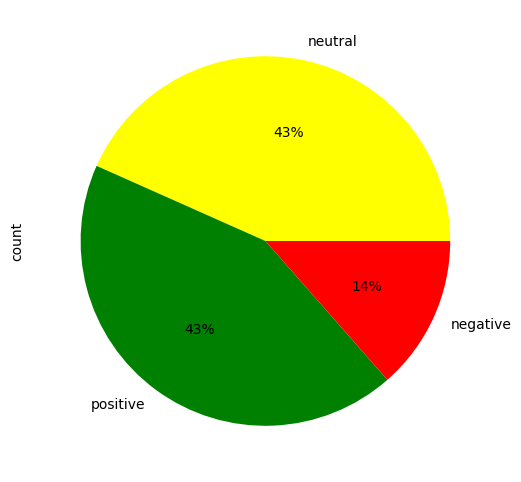

In [63]:
# Sentiment pie chart
df.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["yellow", "green", "red"])
plt.show()

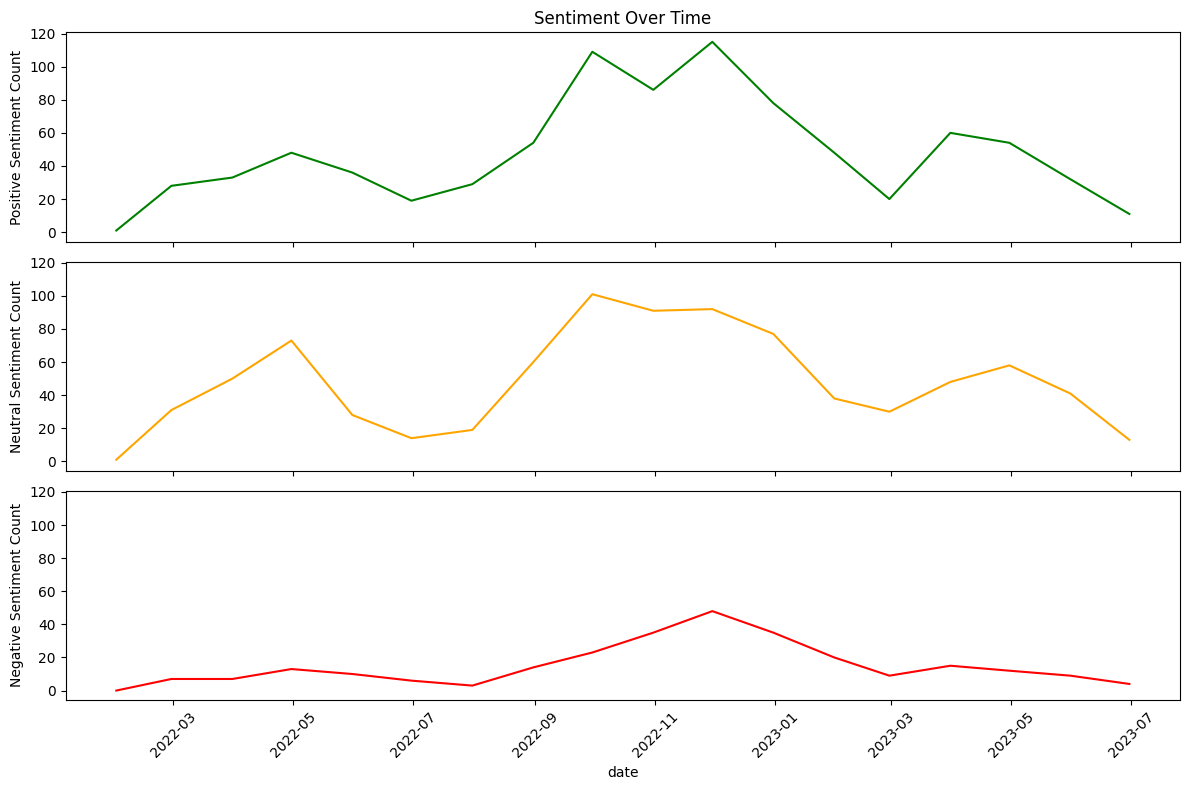

In [75]:
# Convert 'Date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Count sentiment occurrences per month
sentiment_counts = df.groupby([pd.Grouper(key='date', freq='M'), 'sentiment']).size().unstack(fill_value=0)

# Creating separate axes for each sentiment
fig, axes = plt.subplots(nrows=3, figsize=(12, 8), sharex=True, sharey=True)

# Plotting positive sentiment
axes[0].plot(sentiment_counts.index, sentiment_counts['positive'], color='green')
axes[0].set_ylabel('Positive Sentiment Count')
axes[0].set_title('Sentiment Over Time')

# Plotting neutral sentiment
axes[1].plot(sentiment_counts.index, sentiment_counts['neutral'], color='orange')
axes[1].set_ylabel('Neutral Sentiment Count')

# Plotting negative sentiment
axes[2].plot(sentiment_counts.index, sentiment_counts['negative'], color='red')
axes[2].set_xlabel('date')
axes[2].set_ylabel('Negative Sentiment Count')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Sentiment Analysis Classification

In [76]:
# Split data into only those that occur in at least 7 documents
features = df['description']
vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stop)
processed_features = vectorizer.fit_transform(features).toarray()

In [77]:
# Create train test split
labels = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [105]:
# Train a Random Forest ML model on the data
text_classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [106]:
# Generate a testing model
predictions = text_classifier.predict(X_test)

In [107]:
# Evauluate Model with Confusion matrix
cm = confusion_matrix(y_test,predictions)
print(cm)

[[ 31  36   3]
 [  4 148   9]
 [  1  32 136]]


In [108]:
# Accuracy score - can accurately predict a sentiment 79% of the time
accuracy_score(y_test,predictions)

0.7875

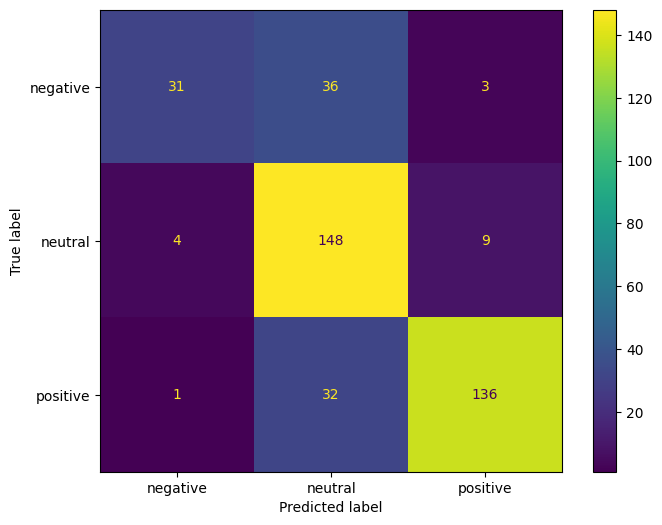

In [109]:
# Visual confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,predictions)

In [91]:
# Classification report
print(classification_report(y_test,predictions))
# You want an F1 score above 0.90 if possible.

              precision    recall  f1-score   support

    negative       0.79      0.43      0.56        70
     neutral       0.69      0.91      0.78       161
    positive       0.91      0.80      0.86       169

    accuracy                           0.78       400
   macro avg       0.80      0.71      0.73       400
weighted avg       0.80      0.78      0.77       400



## Topic Modeling

This topic modeling will be done two (2) ways:
1. Latent Dirichlet Allocation (LDA)
2. Non-Negative Matrix Factorization

First decided to run 5 topics and that was too little. Doubled the number of topics to 10 and this made much more sense in terms of what the articles were actually talking about.

### Latent Dirichlet Allocation (LDA)
LDA is a natural language processing technique that creates topics based on the co-occurrence of words in documents.

In [110]:
# Make sure a term occurs in 80% of less of documents
vectorizer = CountVectorizer(max_df=0.8, min_df=4, stop_words='english')

In [111]:
# Create document term matrix
doc_term_matrix = vectorizer.fit_transform(df['description'].values.astype('U')) # U = unicode 

In [112]:
# Check shape of doc term matrix
doc_term_matrix.shape

(1996, 1254)

In [138]:
# Fit LDA (this could take awhile if you have a large dataset)
LDA = LatentDirichletAllocation(n_components=10, random_state=35) # Set random state so each time the results are the same - n_components = number of topics to create
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(random_state=35)

In [139]:
# Retrieve words in first topic
first_topic = LDA.components_[0]
top_topic_words = first_topic.argsort()[-10:]

for i in top_topic_words:
    print(vectorizer.get_feature_names_out()[i])

big
play
georgia
open
black
peach
final
colleg
end
bowl


In [140]:
# Print out top words for topics
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['big', 'play', 'georgia', 'open', 'black', 'peach', 'final', 'colleg', 'end', 'bowl']


Top 10 words for topic #1:
['spring', 'discuss', 'return', 'expect', 'offen', 'defen', 'jim', 'say', 'ryan', 'day']


Top 10 words for topic #2:
['class', 'chri', '2022', 'garrett', 'wilson', 'new', 'receiv', '2023', 'draft', 'nfl']


Top 10 words for topic #3:
['kyle', 'nfl', 'year', 'receiv', 'brown', 'player', 'marvin', 'touchdown', 'jr', 'harrison']


Top 10 words for topic #4:
['defen', 'player', 'win', 'jr', 'saturday', 'offen', 'johnson', 'michigan', 'coach', 'play']


Top 10 words for topic #5:
['run', 'offen', 'spring', 'win', 'henderson', 'treveyon', 'miyan', 'practic', 'field', 'william']


Top 10 words for topic #6:
['tackl', 'time', 'includ', '2022', 'end', 'win', 'record', 'player', 'defen', 'michigan']


Top 10 words for topic #7:
['predict', 'playoff', 'come', 'win', 'dame', 'notr', 'score', 'play', 'transfer', 'colleg']


Top 10 words for topic #8:
['styl

In [141]:
# Add topics to document term matrix
topic_values = LDA.transform(doc_term_matrix)

# Assign values to new column called topic
df['topic'] = topic_values.argmax(axis=1)

# View data
df.head()

,title,description,date,score,sentiment,topic,topic2
0,SMITH “EXCITED ABOUT HAVING NO DIVISIONS”,gene smith happi big ten go divisionless ok pl...,2023-06-08,1.0,positive,9,4
1,"OSU AT UCLA IN 2024, HOSTS USC IN 2025",play ucla road 2024 set host usc 2025 big ten ...,2023-06-08,1.0,positive,0,4
2,MICHIGAN WILL BE ONLY ANNUAL OPPONENT,play michigan everi year play everi big ten le...,2023-06-08,1.0,positive,0,4
3,JAYDEN BONSU,jayden bonsu experi three safeti posit speed a...,2023-06-08,0.0,neutral,8,0
4,B1G TO UNVEIL NEW SCHEDULE MODEL THURSDAY,big ten relea new schedul model everi play 202...,2023-06-07,2.0,positive,0,4


### Non-Negative Matrix Factorization
This is a supervised learning technique in which a matrix is factored into two matrices.

In [134]:
tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')
doc_term_matrix2 = tfidf_vect.fit_transform(df['description'].values.astype('U'))

In [135]:
# Fit data to create 10 topics, set random seed (can pick any number you want, but keep it the same each time)
nmf = NMF(n_components=10, random_state=42)
nmf.fit(doc_term_matrix2)

/Users/wesjurden/Library/Python/3.8/lib/python/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF(n_components=10, random_state=42)

In [136]:
# Pull list for first topic
first_topic = nmf.components_[0]
top_topic_words = first_topic.argsort()[-10:]

for i in top_topic_words:
    print(tfidf_vect.get_feature_names_out()[i])

end
start
line
coordin
say
tackl
offen
knowl
jim
defen


In [137]:
# Pull words for the 5 topics created
for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vect.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['end', 'start', 'line', 'coordin', 'say', 'tackl', 'offen', 'knowl', 'jim', 'defen']


Top 10 words for topic #1:
['award', 'firstteam', 'eichenberg', 'tommi', 'allamerican', 'johnson', 'pari', 'marvin', 'harrison', 'jr']


Top 10 words for topic #2:
['throw', 'big', 'pari', 'trophi', 'heisman', 'smithnjigba', 'jaxon', 'quarterback', 'stroud', 'cj']


Top 10 words for topic #3:
['expect', 'took', 'spring', 'preview', 'media', 'coach', 'discuss', 'say', 'ryan', 'day']


Top 10 words for topic #4:
['peach', 'snap', 'georgia', 'michigan', 'bowl', 'time', 'playoff', 'year', 'colleg', 'play']


Top 10 words for topic #5:
['becom', 'spring', '2022', 'stripe', 'black', 'safeti', 'freshman', 'enter', 'portal', 'transfer']


Top 10 words for topic #6:
['2023', 'select', 'receiv', 'olav', 'chri', 'wilson', 'garrett', 'pick', 'draft', 'nfl']


Top 10 words for topic #7:
['return', 'expect', 'injuri', 'run', 'miyan', 'william', 'henderson', 'treveyon', 'jaxon', 'smithnj

In [142]:
# Create topic2 column
topic_values2 = nmf.transform(doc_term_matrix2)
df['topic2'] = topic_values2.argmax(axis=1)
df.head()

,title,description,date,score,sentiment,topic,topic2
0,SMITH “EXCITED ABOUT HAVING NO DIVISIONS”,gene smith happi big ten go divisionless ok pl...,2023-06-08,1.0,positive,9,4
1,"OSU AT UCLA IN 2024, HOSTS USC IN 2025",play ucla road 2024 set host usc 2025 big ten ...,2023-06-08,1.0,positive,0,4
2,MICHIGAN WILL BE ONLY ANNUAL OPPONENT,play michigan everi year play everi big ten le...,2023-06-08,1.0,positive,0,4
3,JAYDEN BONSU,jayden bonsu experi three safeti posit speed a...,2023-06-08,0.0,neutral,8,0
4,B1G TO UNVEIL NEW SCHEDULE MODEL THURSDAY,big ten relea new schedul model everi play 202...,2023-06-07,2.0,positive,0,4


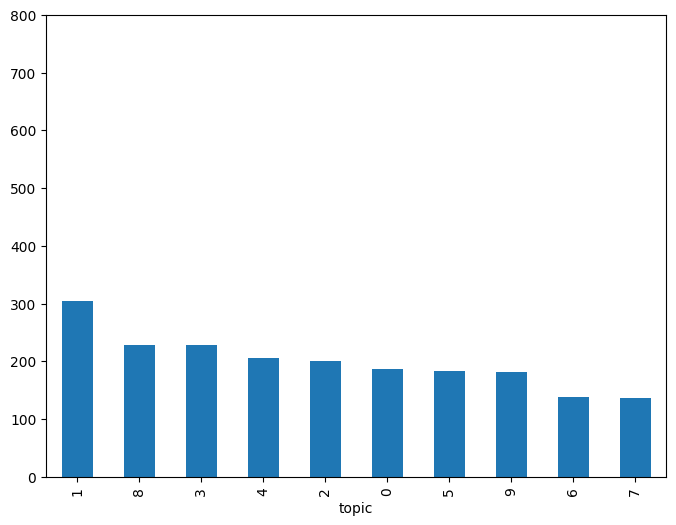

In [143]:
df.topic.value_counts().plot(kind='bar')
plt.ylim(0,800)
plt.show()

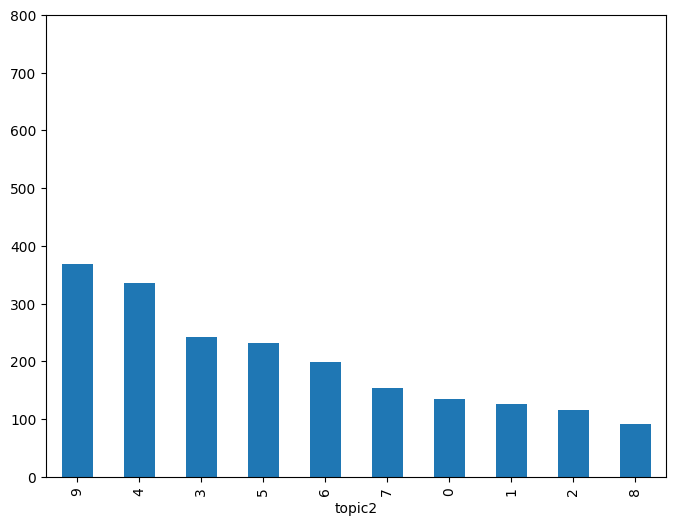

In [144]:
df.topic2.value_counts().plot(kind='bar')
plt.ylim(0,800)
plt.show()

In [147]:
df[df.topic == 1]

,title,description,date,score,sentiment,topic,topic2
17,“THE ADDITION OF JOE HAS BEEN PHENOMENAL”,brian hartlin expect learn joe philbin philbin...,2023-06-03,0.0,neutral,1,6
19,DAY SAYS NIL BRINGS CHALLENGES IN PORTAL,appear guest chri holtmann podcast wednesday r...,2023-06-02,-1.0,negative,1,3
23,DAY CONTINUES TO MOLD OSU POST-URBAN,ryan day continu mold manageri style still mai...,2023-06-01,2.0,positive,1,3
32,HENRY’S RETURN “WAY DOWN THE ROAD”,justin frye said yet discuss return averi henr...,2023-05-31,1.0,positive,1,3
35,UPDATES FROM OSU’S OFFENSIVE COACHES,brian hartlin isnt take respon oc lightli core...,2023-05-30,3.0,positive,1,3
...,...,...,...,...,...,...,...
1902,"DAY, KNOWLES, WILSON TALK START OF SPRING",ryan day jim knowl kevin wilson spoke member m...,2022-03-08,0.0,neutral,1,3
1975,“I DON'T HAVE FOUR YEARS HERE”,expect timefram defen turnaround shorter ever ...,2022-02-04,0.0,neutral,1,0
1983,FRYE WANTS O-LINE TO BE “FELT” IN 2022,new offen line coach justin frye say offen alr...,2022-02-02,6.0,positive,1,0
1992,DAY WILL CONTINUE RUNNING OFFENSE,even though offen coordin pass coordin run coo...,2022-02-01,0.0,neutral,1,3


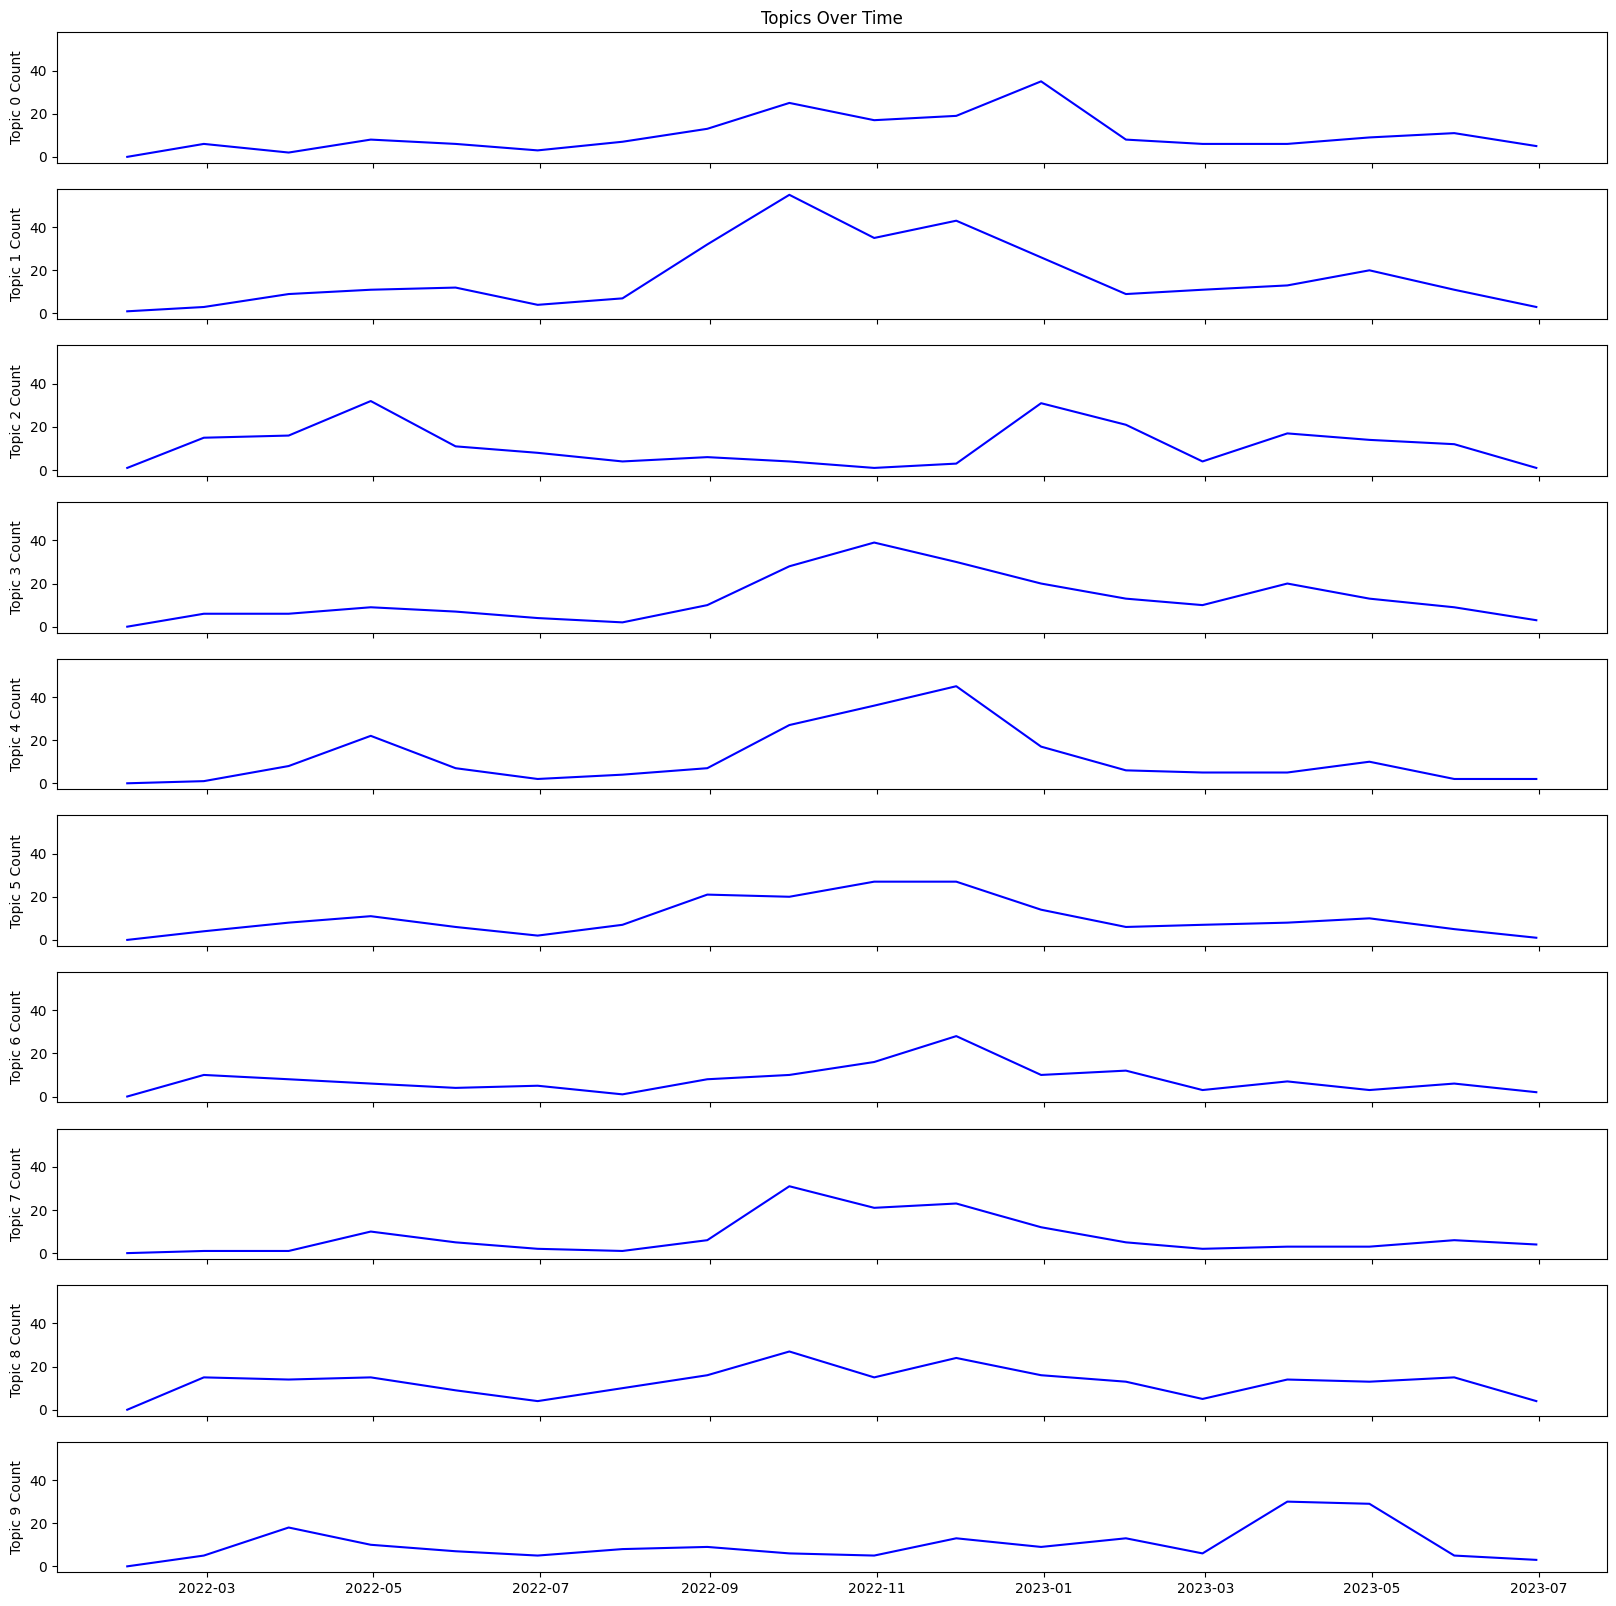

In [166]:
# Convert 'Date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Count topic occurrences per month
topic_counts = df.groupby([pd.Grouper(key='date', freq='M'), 'topic']).size().unstack(fill_value=0)

# Creating separate axes for each topic
fig, axes = plt.subplots(nrows=10, figsize=(20, 20), sharex=True, sharey=True)
axes[0].set_title('Topics Over Time')

for i in range(0,10):
    # Plotting topic over time
    axes[i].plot(topic_counts.index, topic_counts[i], color='blue')
    axes[i].set_ylabel(f'Topic {i} Count')


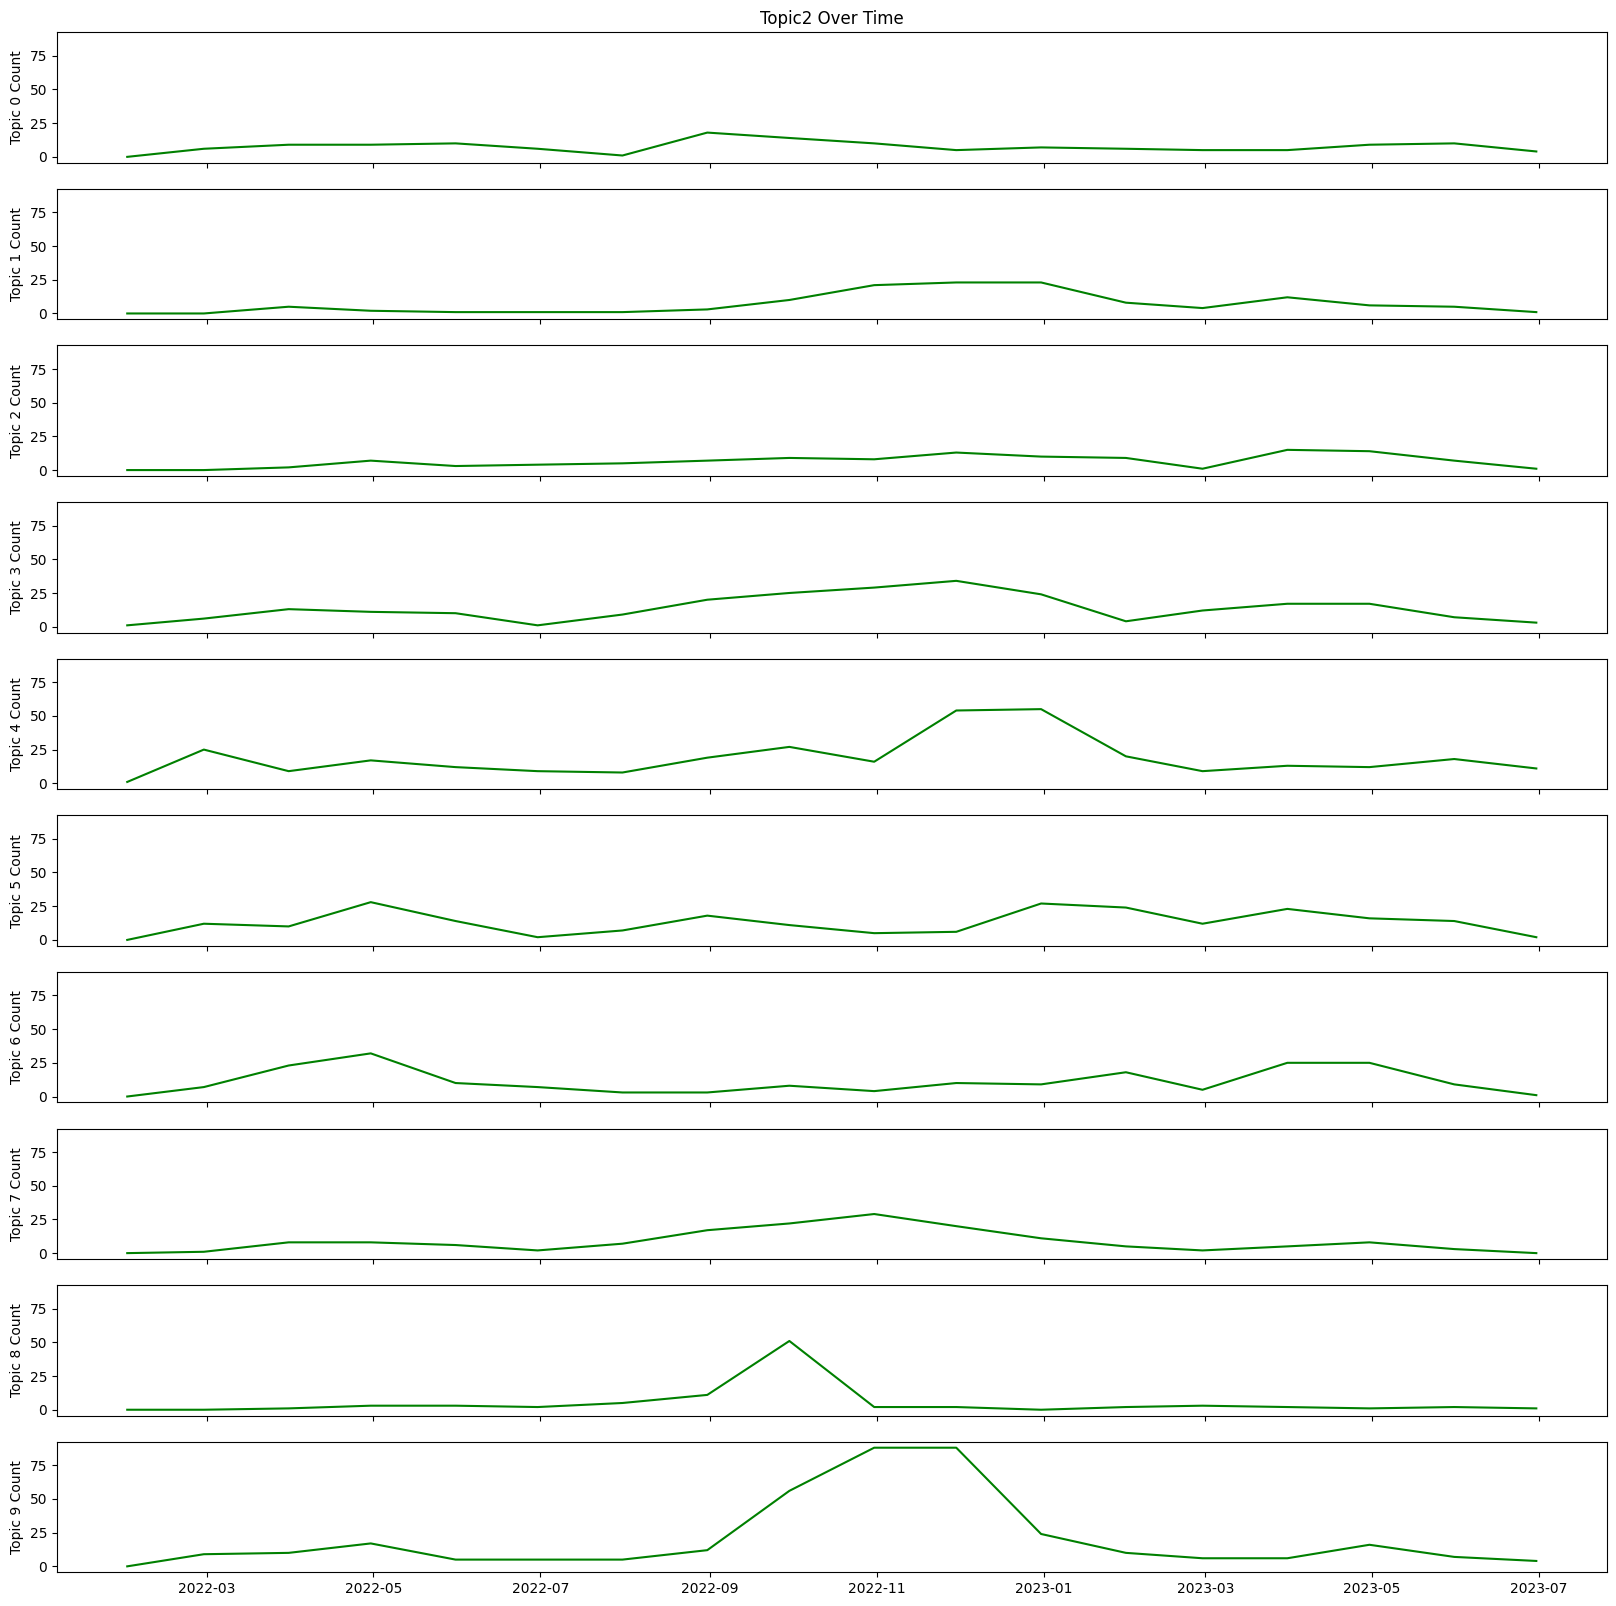

In [167]:
# Convert 'Date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Count topic occurrences per month
topic2_counts = df.groupby([pd.Grouper(key='date', freq='M'), 'topic2']).size().unstack(fill_value=0)

# Creating separate axes for each topoc
fig, axes = plt.subplots(nrows=10, figsize=(20, 20), sharex=True, sharey=True)
axes[0].set_title('Topic2 Over Time')

for i in range(0,10):
    # Plotting topics
    axes[i].plot(topic2_counts.index, topic2_counts[i], color='green')
    axes[i].set_ylabel(f'Topic {i} Count')
